In [38]:
#All the Imports needed for the files to Run.
import struct
import datetime
import cv2
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.optimizers import Adadelta
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

In [30]:
#Read the file from the path
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [31]:
#Get the data into variables
x_train = read_idx("./fashion_mnist/train-images-idx3-ubyte")
y_train = read_idx("./fashion_mnist/train-labels-idx1-ubyte")
x_test = read_idx("./fashion_mnist/t10k-images-idx3-ubyte")
y_test = read_idx("./fashion_mnist/t10k-labels-idx1-ubyte")

In [32]:
#Lets analyse the Data.
print('The shape of x_train is {}'.format(x_train.shape))
print('The size of Image is {} x {} = {}'.format(x_train.shape[1], x_train.shape[2], x_train.shape[1]*x_train.shape[2]))
print('The samples in Training Data are {}'.format(x_train.shape[0]))
print('The samples in Test Data are {}'.format(x_test.shape[0]))

The shape of x_train is (60000, 28, 28)
The size of Image is 28 x 28 = 784
The samples in Training Data are 60000
The samples in Test Data are 10000


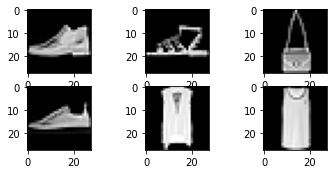

In [33]:
#Lets visualise the Data
num_visualisation = 6
for i in range(num_visualisation):
    subplot_num = 331 + i
    plt.subplot(subplot_num)
    random_num = np.random.randint(0,len(x_train))
    plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.show()

In [34]:
#Declaring Batch size and Number of epochs.
batch_size = 128
epochs = 10

#Pre process the data 
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

#Lets reshape the Image, It has shape of (60000, 28, 28) to (60000, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

#Lets Convert The Data into Float32 format for normalizing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Lets convert the Data in format 0--1 rather than 0--255
x_train /= 255
x_test /= 255

#Convert The labels to Encoded format
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#Number of Columns are the Number of Classes, Count the Number of Samples in Test and Train
print("Number of Classes: {}".format(y_test.shape[1]))
print("Number of Train Samples: {}".format(x_train.shape[0]))
print("Number of Test Samples: {}".format(x_test.shape[0]))

#Lets find the Input Image size
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]
input_shape = (img_rows, img_cols, 1)


Number of Classes: 10
Number of Train Samples: 60000
Number of Test Samples: 10000


In [35]:
#Lets Define the Model and Layers

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#Lets compile the Model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

#Lets see the Summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)             

In [36]:
#Make Variable for Storing The Logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#Lets Define Callbacks
checkpoint = ModelCheckpoint("./fashion_mnist.h5", monitor="val_loss", mode="min", save_best_only = True, verbose=1)
earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)

#Creating Callback list
callbacks = [checkpoint, earlystop, tensorboard]

#Lets Fit The model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 171s 364ms/step - loss: 2.2725 - accuracy: 0.3247 - val_loss: 1.3642 - val_accuracy: 0.5234
Epoch 2/10
469/469 [==============================] - 173s 368ms/step - loss: 1.4346 - accuracy: 0.5417 - val_loss: 0.8196 - val_accuracy: 0.7113
Epoch 3/10
469/469 [==============================] - 167s 355ms/step - loss: 1.1677 - accuracy: 0.6219 - val_loss: 0.7226 - val_accuracy: 0.7444
Epoch 4/10
469/469 [==============================] - 160s 341ms/step - loss: 1.0275 - accuracy: 0.6617 - val_loss: 0.6632 - val_accuracy: 0.7644
Epoch 5/10
469/469 [==============================] - 163s 348ms/step - loss: 0.9428 - accuracy: 0.6870 - val_loss: 0.6252 - val_accuracy: 0.7775
Epoch 6/10
469/469 [==============================] - 160s 341ms/step - loss: 0.8710 - accuracy: 0.7091 - val_loss: 0.5945 - val_accuracy: 0.7885
Epoch 7/10
469/469 [==============================] - 172s 366ms/step - loss: 0.8360 - accuracy: 0.7209 - val_loss: 0.5709 -

NameError: name 'socre' is not defined

In [37]:
#Evaluate The Model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {} %'.format(score[0] * 100))
print('Test accuracy: {} %'.format(score[1] * 100))

Test loss: 52.52695083618164 %
Test accuracy: 81.41000270843506 %


In [40]:
def getLabel(input_class):
    number = int(input_class)
    if number == 0:
        return "T-shirt/top "
    if number == 1:
        return "Trouser"
    if number == 2:
        return "Pullover"
    if number == 3:
        return "Dress"
    if number == 4:
        return "Coat"
    if number == 5:
        return "Sandal"
    if number == 6:
        return "Shirt"
    if number == 7:
        return "Sneaker"
    if number == 8:
        return "Bag"
    if number == 9:
        return "Ankle boot"

def draw_test(name, pred, actual, input_im):
    BLACK = [0,0,0]

    res = getLabel(pred)
    actual = getLabel(actual)   
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, 4*imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, "Predicted - " + str(res), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,255,0), 1)
    cv2.putText(expanded_image, "   Actual - " + str(actual), (152, 90) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,0,255), 1)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    actual = y_test[rand].argmax(axis=0)
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, actual, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()